In [565]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

In [566]:
data = pd.read_csv("df_par_id.csv")

In [567]:
data = data.sample(60000)

In [568]:
data = data[[ 'freight_value', 'review_score',
       'score_freq',  'score_rec', 'score_montant', 'order_purchase_timestamp',
       'customer_city', 
       'categorie_regroupee']]

In [569]:
data["order_purchase_timestamp"] = data["order_purchase_timestamp"].str[:10]
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], errors='coerce')
data = data[data['order_purchase_timestamp'].notna()]
data  = data.sort_values('order_purchase_timestamp')

In [570]:
data = data[[ 'freight_value', 'review_score',
       'score_freq',  'score_rec', 'score_montant', 
      
       'categorie_regroupee']]

## classer DF d'apres order_purchased_timestamp 

In [571]:
data

,freight_value,review_score,score_freq,score_rec,score_montant,categorie_regroupee
68464,14.11,1.0,1.0,1.0,1.0,Mode de Vie
36360,17.24,3.0,1.0,1.0,1.0,Mode de Vie
52193,13.56,1.0,1.0,1.0,4.0,Mobilier
17627,17.19,4.0,1.0,1.0,1.0,Mode de Vie
6314,17.37,1.0,1.0,1.0,3.0,Mobilier
...,...,...,...,...,...,...
4647,8.45,5.0,1.0,5.0,4.0,Mode
1530,9.52,5.0,1.0,5.0,3.0,Alimentation
47461,15.39,5.0,1.0,5.0,2.0,Beauté et Santé
12618,7.39,5.0,1.0,5.0,1.0,Mode de Vie


In [572]:
n = int(len(data) * 0.9) # calculate the index of the last row to keep
data_pourcent = data.iloc[:n, :] # create a new DataFrame with the first 90% of the rows


In [573]:
data_pourcent = data_pourcent.dropna()


In [574]:
m = int(len(data) * 0.5) # calculate the index of the last row to keep
data_pourcente = data.iloc[:m, :] # create a new DataFrame with the first 90% of the rows


In [575]:
o = int(len(data) * 0.6) # calculate the index of the last row to keep
data_pourcendix = data.iloc[:o, :] # create a new DataFrame with the first 10% of the rows

In [576]:
data_pourcent

,freight_value,review_score,score_freq,score_rec,score_montant,categorie_regroupee
68464,14.11,1.0,1.0,1.0,1.0,Mode de Vie
36360,17.24,3.0,1.0,1.0,1.0,Mode de Vie
52193,13.56,1.0,1.0,1.0,4.0,Mobilier
17627,17.19,4.0,1.0,1.0,1.0,Mode de Vie
6314,17.37,1.0,1.0,1.0,3.0,Mobilier
...,...,...,...,...,...,...
79081,23.39,4.0,1.0,5.0,3.0,Mobilier
40881,23.43,5.0,1.0,5.0,3.0,Bricolage et Jardin
47061,15.33,5.0,1.0,5.0,1.0,Mode de Vie
28578,8.03,5.0,1.0,5.0,4.0,Beauté et Santé


In [577]:
n

52951

In [578]:
# drop la date pour chaque dataframe 

In [579]:
data.dtypes

freight_value          float64
review_score           float64
score_freq             float64
score_rec              float64
score_montant          float64
categorie_regroupee     object
dtype: object

In [580]:
data = data.dropna()

In [581]:
data.columns

Index(['freight_value', 'review_score', 'score_freq', 'score_rec',
       'score_montant', 'categorie_regroupee'],
      dtype='object')

### K prototypes

In [582]:
data.columns

Index(['freight_value', 'review_score', 'score_freq', 'score_rec',
       'score_montant', 'categorie_regroupee'],
      dtype='object')

In [583]:

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data.columns if data[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data[numeric_cols]
categorical_data = data[categorical_cols]




# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()



# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires


In [584]:
kproto = KPrototypes(n_clusters=5, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2,random_state=42)

 # entraîner le modèle sur les données combinées
clusters = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print("Cluster labels:", clusters) 

Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 1, iteration: 1/20, moves: 11648, ncost: 193128.27826421254
Run: 2, iteration: 1/20, moves: 20485, ncost: 193444.90709961066
Run: 1, iteration: 2/20, moves: 8913, ncost: 180137.48628956306
Run: 2, iteration: 2/20, moves: 3818, ncost: 192116.0719078139
Run: 1, iteration: 3/20, moves: 3355, ncost: 177620.19684369085
Run: 2, iteration: 3/20, moves: 4751, ncost: 186397.49033243433
Run: 1, iteration: 4/20, moves: 1449, ncost: 177163.75694407706
Run: 2, iteration: 4/20, moves: 6074, ncost: 178919.02454774056
Run: 1, iteration: 5/20, moves: 649, ncost: 177046.83132462556
Run: 2, iteration: 5/20, moves: 5886, ncost: 176086.5442002863
Run: 1, iteration: 6/20, moves: 559, ncost: 176984.17972786978
Run: 2, iteration: 6/20, moves: 2410, ncost: 175704.18142097723
Run: 1, iteration: 7/20, moves: 333, ncost: 176965.26714672943
Run: 2, ite

In [585]:
clusters

array([4, 3, 4, ..., 1, 1, 1], dtype=uint16)

In [586]:
from sklearn.metrics.cluster import adjusted_rand_score

In [587]:

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data_pourcent.columns if data_pourcent[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data_pourcent.columns if data_pourcent[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data_pourcent[numeric_cols]
categorical_data = data_pourcent[categorical_cols]




# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires
kproto = KPrototypes(n_clusters=5, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2)

 # entraîner le modèle sur les données combinées
clusters_pourcent = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print("Cluster labels:", clusters) 


Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/20, moves: 12070, ncost: 161495.905117073
Run: 1, iteration: 1/20, moves: 11355, ncost: 174709.6514539591
Run: 2, iteration: 2/20, moves: 6016, ncost: 158873.78852509058
Run: 1, iteration: 2/20, moves: 8266, ncost: 168216.9828673788
Run: 2, iteration: 3/20, moves: 752, ncost: 158782.45331705388
Run: 1, iteration: 3/20, moves: 4976, ncost: 163064.95088798454
Run: 2, iteration: 4/20, moves: 230, ncost: 158751.85092153374
Run: 1, iteration: 4/20, moves: 1799, ncost: 160747.9969732841
Run: 2, iteration: 5/20, moves: 253, ncost: 158735.48446742544
Run: 1, iteration: 5/20, moves: 881, ncost: 160400.87144623374
Run: 2, iteration: 6/20, moves: 197, ncost: 158725.5635009435
Run: 1, iteration: 6/20, moves: 681, ncost: 160299.49338288535
Run: 2, iteration: 7/20, moves: 107, ncost: 158722.58541477207
Run: 1, iteration: 

In [588]:

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data_pourcente.columns if data_pourcente[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data_pourcente.columns if data_pourcente[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data_pourcente[numeric_cols]
categorical_data = data_pourcente[categorical_cols]




# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires
kproto = KPrototypes(n_clusters=5, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2)

 # entraîner le modèle sur les données combinées
clusters_pourcente = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print("Cluster labels:", clusters) 


Init: initializing centroidsInit: initializing centroids

Init: initializing clusters
Init: initializing clusters
Starting iterations...
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 5937, ncost: 88333.08945363657
Run: 1, iteration: 2/20, moves: 1890, ncost: 87323.54139397563
Run: 2, iteration: 1/20, moves: 8660, ncost: 101985.5023332659
Run: 1, iteration: 3/20, moves: 409, ncost: 87101.05752276855
Run: 2, iteration: 2/20, moves: 4757, ncost: 96432.55358548081
Run: 1, iteration: 4/20, moves: 119, ncost: 87041.92362902187
Run: 2, iteration: 3/20, moves: 1533, ncost: 95811.44940777417
Run: 1, iteration: 5/20, moves: 62, ncost: 87019.97182642668
Run: 2, iteration: 4/20, moves: 254, ncost: 95786.47268130255
Run: 1, iteration: 6/20, moves: 29, ncost: 87015.60144747938
Run: 2, iteration: 5/20, moves: 186, ncost: 95765.19915448972
Run: 1, iteration: 7/20, moves: 14, ncost: 87014.34288301536
Run: 2, iteration: 6/20, moves: 66, n

In [589]:

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data_pourcendix.columns if data_pourcendix[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data_pourcendix.columns if data_pourcendix[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data_pourcendix[numeric_cols]
categorical_data = data_pourcendix[categorical_cols]




# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires
kproto = KPrototypes(n_clusters=5, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2)

 # entraîner le modèle sur les données combinées
clusters_pourcendix = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print("Cluster labels:", clusters) 


Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/20, moves: 7762, ncost: 100482.49680775945
Run: 1, iteration: 1/20, moves: 9124, ncost: 107174.97191501022
Run: 2, iteration: 2/20, moves: 3381, ncost: 94186.35354736002
Run: 1, iteration: 2/20, moves: 2440, ncost: 105799.59687883161
Run: 2, iteration: 3/20, moves: 1711, ncost: 91875.44474620711
Run: 1, iteration: 3/20, moves: 724, ncost: 105282.06416628456
Run: 1, iteration: 4/20, moves: 256, ncost: 105127.78974565462
Run: 2, iteration: 4/20, moves: 451, ncost: 91749.64167460726
Run: 1, iteration: 5/20, moves: 150, ncost: 105084.9848259615
Run: 2, iteration: 5/20, moves: 101, ncost: 91741.12766686031
Run: 1, iteration: 6/20, moves: 74, ncost: 105070.5665172621
Run: 2, iteration: 6/20, moves: 45, ncost: 91740.50904822645
Run: 1, iteration: 7/20, moves: 20, ncost: 105068.84073923859
Run: 2, iteration: 7/20, m

In [590]:
adjusted_rand_score(clusters_pourcente, clusters_pourcent[:len(clusters_pourcente)])

0.4645967031132408

In [591]:
adjusted_rand_score(clusters[:len(clusters_pourcent)], clusters_pourcent)

0.618252641411393

In [592]:
adjusted_rand_score(clusters_pourcente, clusters[:len(clusters_pourcente)])

0.4123044983426945

In [593]:
adjusted_rand_score(clusters_pourcendix, clusters[:len(clusters_pourcendix)])

0.5316968907635578

In [594]:
x = int(len(data) * 0.8) # calculate the index of the last row to keep
data_test = data.iloc[:x, :] # create a new DataFrame with the first 10% of the rows



# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data_test.columns if data_test[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data_test.columns if data_pourcendix[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data_test[numeric_cols]
categorical_data = data_test[categorical_cols]




# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires
kproto = KPrototypes(n_clusters=5, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2 )

 # entraîner le modèle sur les données combinées
clusters_test = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print(adjusted_rand_score(clusters_test, clusters[:len(clusters_test)]))



Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/20, moves: 12087, ncost: 155181.0489663343
Run: 1, iteration: 1/20, moves: 19287, ncost: 143527.63352305026
Run: 2, iteration: 2/20, moves: 2763, ncost: 154224.32003960438
Run: 1, iteration: 2/20, moves: 4106, ncost: 140835.15431025668
Run: 2, iteration: 3/20, moves: 1043, ncost: 153959.65001440904
Run: 1, iteration: 3/20, moves: 1466, ncost: 140427.5385651921
Run: 2, iteration: 4/20, moves: 409, ncost: 153907.70650977935
Run: 1, iteration: 4/20, moves: 1678, ncost: 139357.4764743142
Run: 2, iteration: 5/20, moves: 536, ncost: 153827.84222517355
Run: 1, iteration: 5/20, moves: 1064, ncost: 138970.40859540782
Run: 2, iteration: 6/20, moves: 1070, ncost: 153565.57891106248
Run: 1, iteration: 6/20, moves: 285, ncost: 138785.1633178282
Run: 2, iteration: 7/20, moves: 838, ncost: 153316.9599546661
Run: 1, iterati

ON COMPARE LE DATA AVEC 50% des donnes avec celui avec 60% puis 80% puis 100%

# on va faire en fonction du nombre de données plutôt 

In [595]:
clusters90 = clusters_pourcent

In [596]:
clusters50 = clusters_pourcente

In [597]:
len(clusters_pourcent)

52951

In [598]:
clusters60 = clusters_pourcendix

In [599]:
clusters80 = clusters_test

In [600]:
ari_100 = adjusted_rand_score(clusters50, clusters[:len(clusters50)])
ari_60 = adjusted_rand_score(clusters50, clusters60[:len(clusters50)])
ari_80 = adjusted_rand_score(clusters50, clusters80[:len(clusters50)])
ari_90 = adjusted_rand_score(clusters50, clusters90[:len(clusters50)])

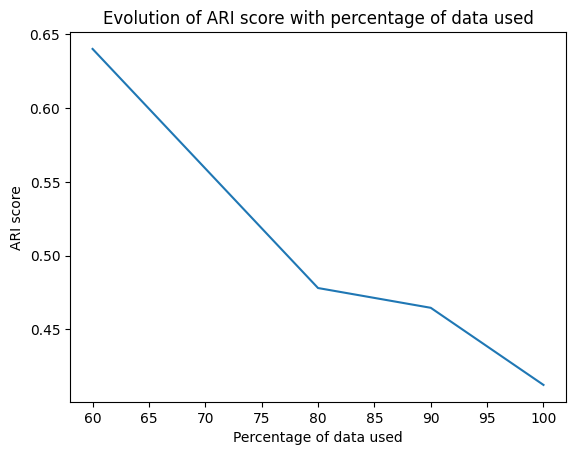

In [601]:
import matplotlib.pyplot as plt

# Define the percentages of data used and the corresponding ARI scores
percentages = [60,80,90,100]
ari_scores = [ari_60,ari_80,ari_90,ari_100]

# Create a line plot of the ARI scores vs the percentage of data used
plt.plot(percentages, ari_scores)
plt.xlabel('Percentage of data used')
plt.ylabel('ARI score')
plt.title('Evolution of ARI score with percentage of data used')
plt.show()
